# Case Study on Probability for Data Science

Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
#import the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#reading the dtaset
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#examining the dataset

In [5]:
# finding the no: rows and columns in the data
data.shape

(8124, 23)

In [6]:
#display basic info about data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#check given data is unique
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [8]:
#checking null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
#describe the given data
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
#check class column is unique or not
data['class'].unique()

array(['p', 'e'], dtype=object)

In [11]:
#display number of samples on each class
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

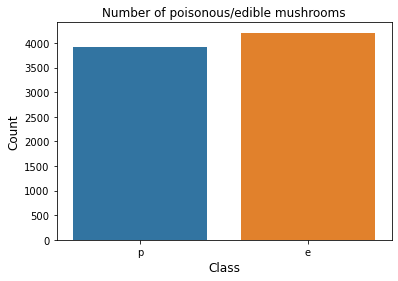

In [12]:
#count plot of class
sns.countplot(data['class'])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

# Data manipulation

In [13]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

ALL the features in the dataset are objecttype(categorical data)convert it into numerical data

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [15]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


from the above figure we can see that veil-type has only one unique value and hence won't contribute anything to the data. So we can safely remove it.

In [16]:
data['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [17]:
data = data.drop(['veil-type'],axis=1)

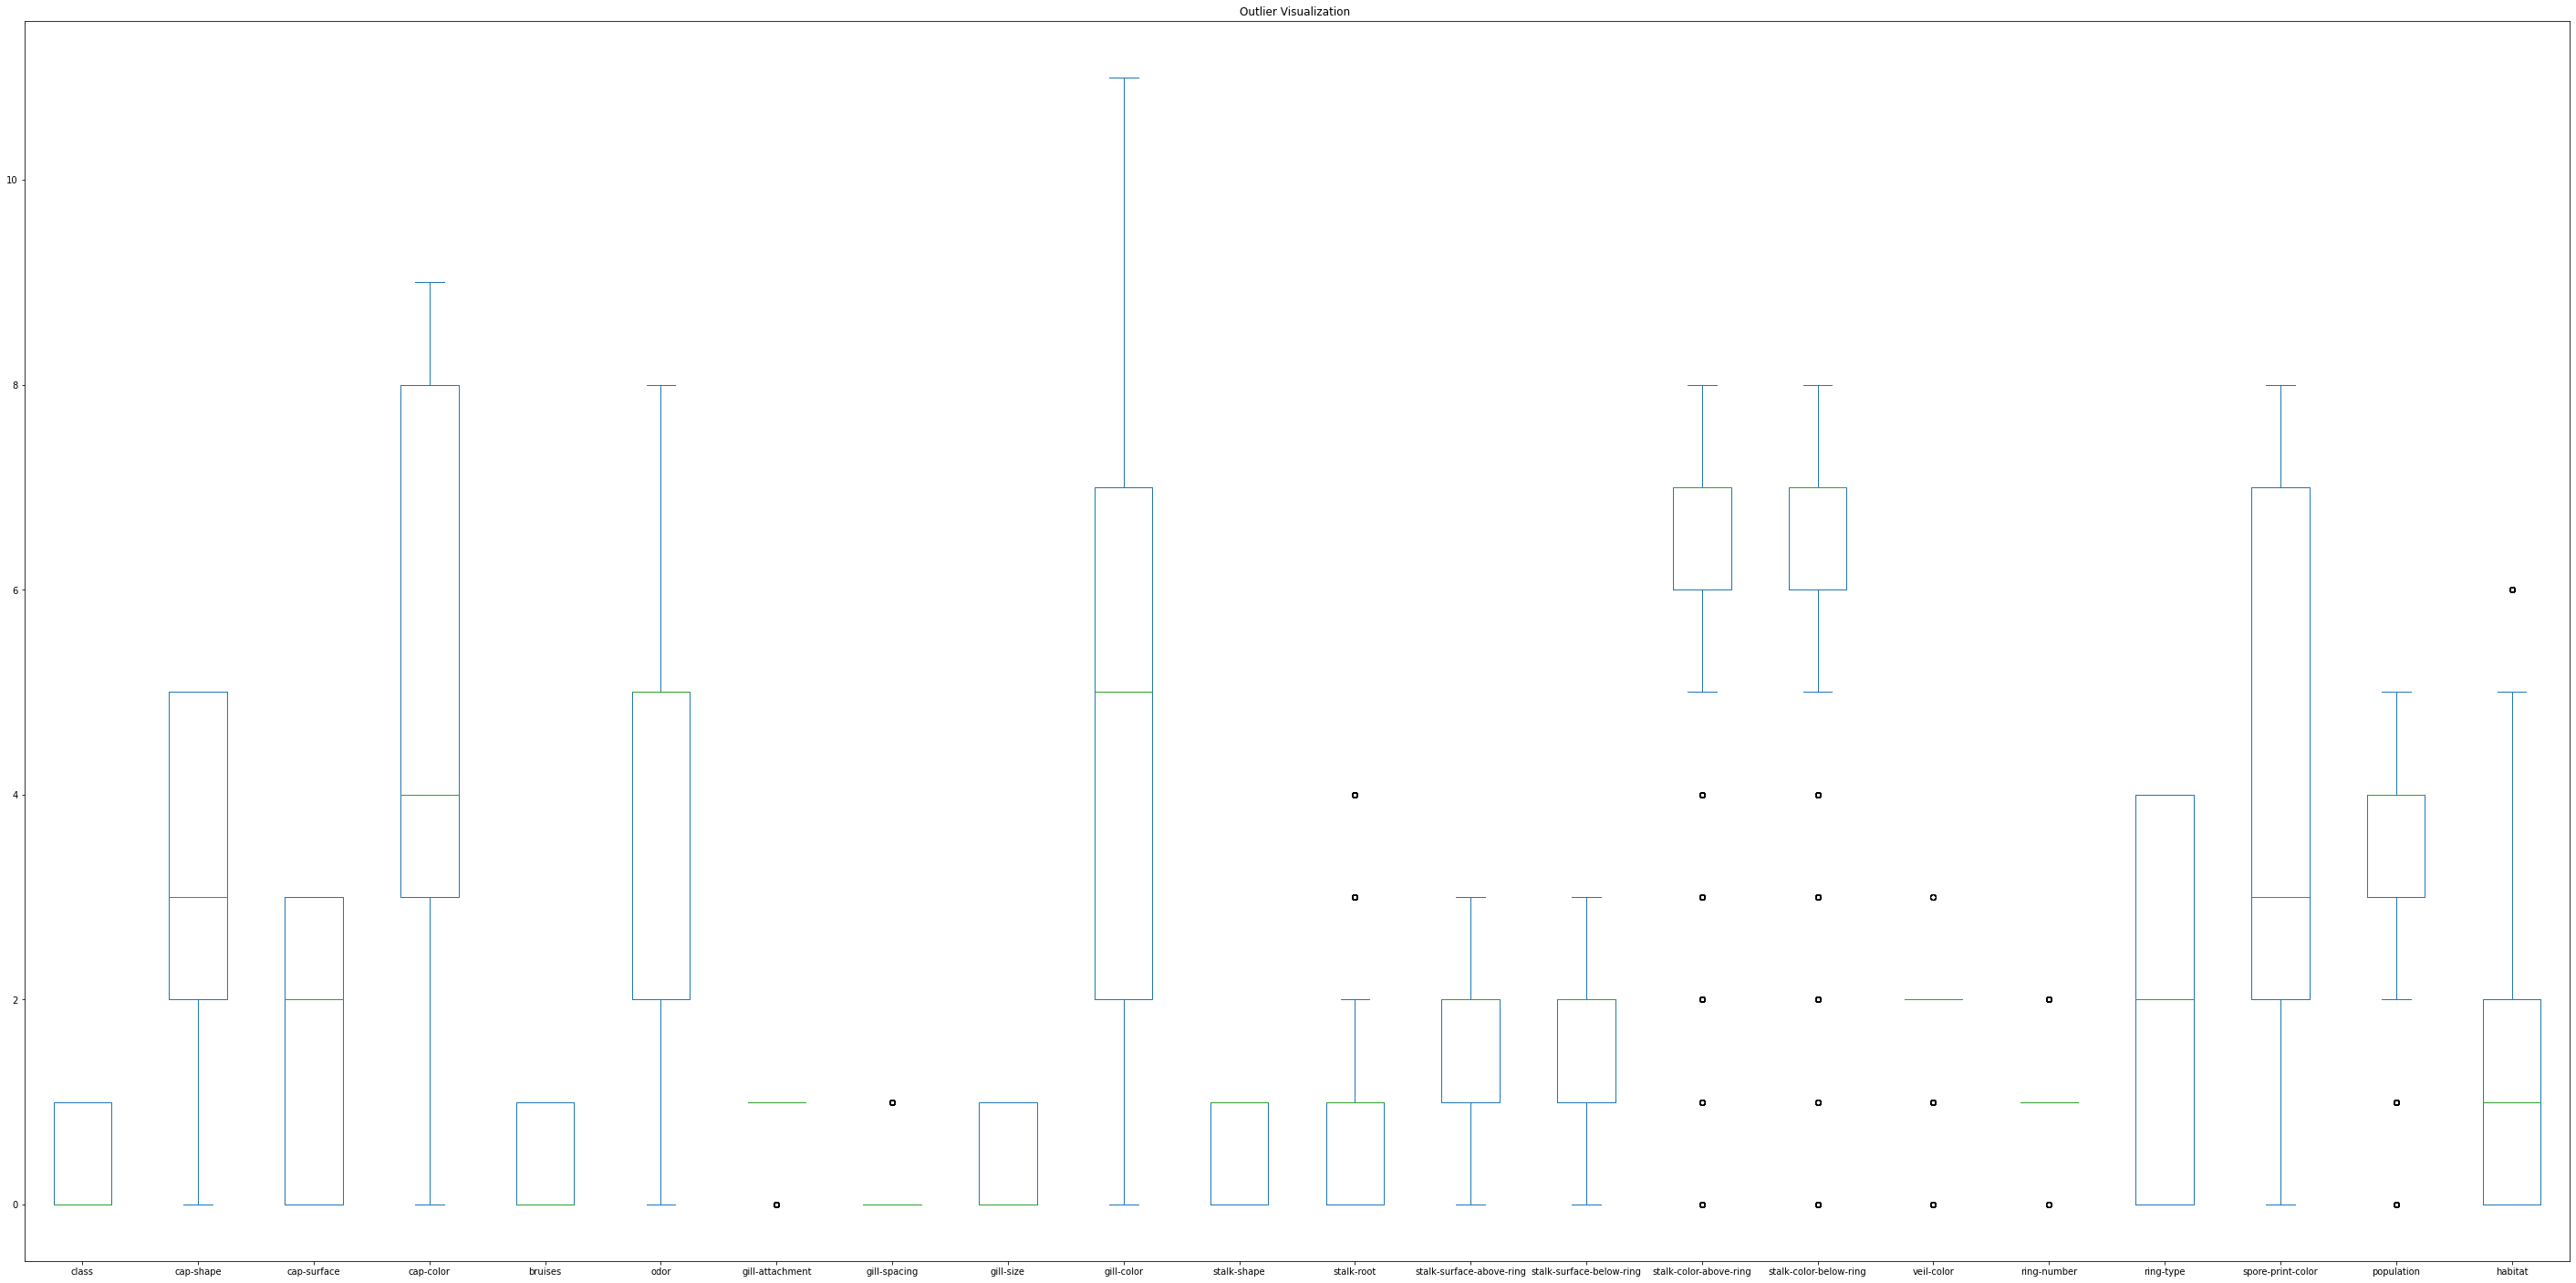

In [18]:
#checking outliers in mushroom datase
data.plot(kind='box',figsize=(50,25))
plt.title("Outlier Visualization ")
plt.show()

<AxesSubplot:>

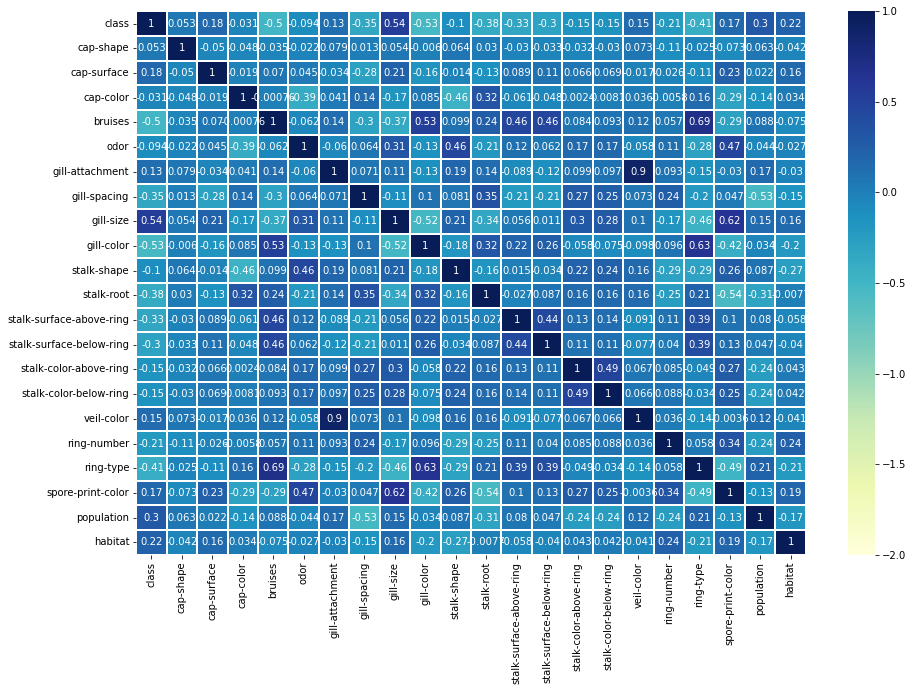

In [19]:
#correlation between variables
corrmatrix =data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [20]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
y= data['class']
x=data.drop(['class'],axis=1)

In [22]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [23]:
#standardScaler
from sklearn.preprocessing import StandardScaler
# Convert data to have zero mean and unit variance
scaler = StandardScaler()
X = scaler.fit_transform(x)
X
 

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

preparing the data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)


In [25]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6499, 21) (6499,)
(1625, 21) (1625,)


In [26]:
print(y_train.value_counts(),'\n', y_test.value_counts())

0    3365
1    3134
Name: class, dtype: int64 
 0    843
1    782
Name: class, dtype: int64


#  Find out which classification model gives the best result to predict 

# Model1 : logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr =logit_model.predict(x_test)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print("Test Accuracy of Logistic Regression classifier: {}%".format(round(logit_model.score(x_test, y_test)*100, 2)))


Test Accuracy of Logistic Regression classifier: 95.2%


Classification report of Logistic Regression Classifier

In [29]:
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



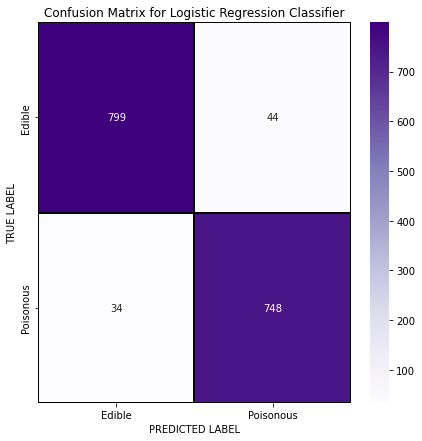

In [30]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Model 2 :KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value of KNN Classifier: {}
Test Accuracy  of KNN Classifier: {}%""".format(best_Kvalue, round(best_score*100,2)))    

Best KNN Value of KNN Classifier: 1
Test Accuracy  of KNN Classifier: 100.0%


Classification report of KNN Classifier

In [33]:
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



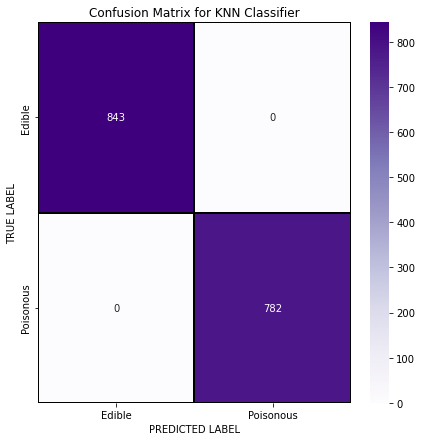

In [34]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Model 3:support vector machine algorithm

# Linear svm

In [35]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
print("Test Accuracy of Linear svm Classifier: {}%".format(round(svm_linear.score(x_test, y_test)*100, 2)))


Test Accuracy of Linear svm Classifier: 98.77%


Classification report of Linear svm Classifier

In [37]:
y_pred_ls =svm_linear.predict(x_test)
print("Linear svm  Classifier report: \n\n", classification_report(y_test, y_pred_ls))

Linear svm  Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99       843
           1       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



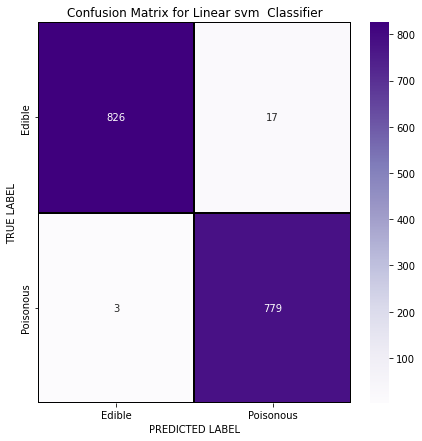

In [38]:
cm = confusion_matrix(y_test, y_pred_ls)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Linear svm  Classifier')
plt.show()

# Polynomial SVM Model

In [39]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)


SVC(kernel='poly')

In [40]:
print("Test Accuracy of Polynomial SVM Classifier: {}%".format(round(svm_poly.score(x_test, y_test)*100, 2)))


Test Accuracy of Polynomial SVM Classifier: 100.0%


Classification report of Polynomial SVM Classifier

In [41]:
y_pred_ps =svm_poly.predict(x_test)
print("Polynomial SVM Classifier report: \n\n", classification_report(y_test, y_pred_ps))


Polynomial SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



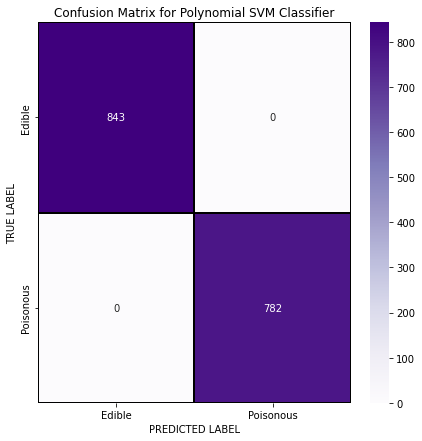

In [42]:
cm = confusion_matrix(y_test, y_pred_ps)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Polynomial SVM Classifier')
plt.show()

# Radial SVM Model

In [43]:
from sklearn.svm import SVC
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)



SVC()

In [44]:
print("Test Accuracy of Radial svm Classifier: {}%".format(round(svm_linear.score(x_test, y_test)*100, 2)))

Test Accuracy of Radial svm Classifier: 98.77%


Classification report of Radial SVM Classifier

In [45]:
y_pred_rs =svm_radial.predict(x_test)
print("Radial SVM Classifier report: \n\n", classification_report(y_test, y_pred_rs))

Radial SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



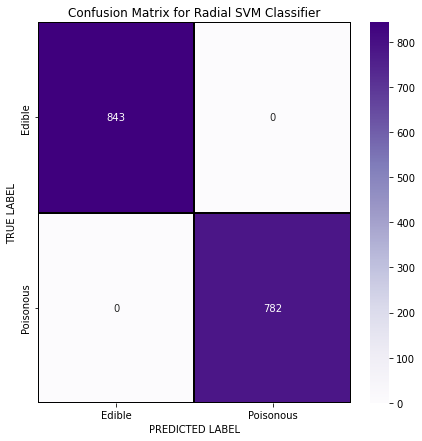

In [46]:
cm = confusion_matrix(y_test, y_pred_rs)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Radial SVM Classifier')
plt.show()

# Model 4: Decision Tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model =  DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
print("Test Accuracy of Radial svm Classifier: {}%".format(round(dt_model.score(x_test, y_test)*100, 2)))

Test Accuracy of Radial svm Classifier: 100.0%


Classification report of  Decision Tree Classifier

In [50]:
y_pred_dt =dt_model.predict(x_test)
print(" Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

 Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



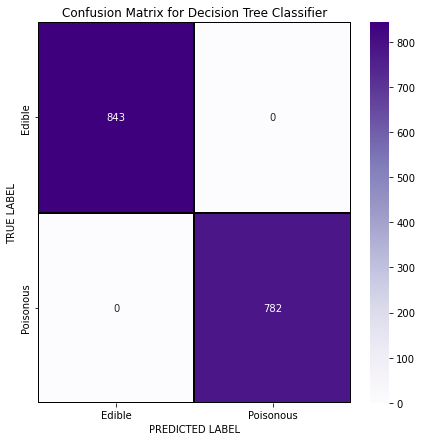

In [51]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Model 5:RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [53]:
print("Test Accuracy of Random Forest Classifier: {}%".format(round(rfc.score(x_test, y_test)*100, 2)))

Test Accuracy of Random Forest Classifier: 100.0%


Classification report of Random Forest Classifier

In [54]:
y_pred_rf = rfc.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



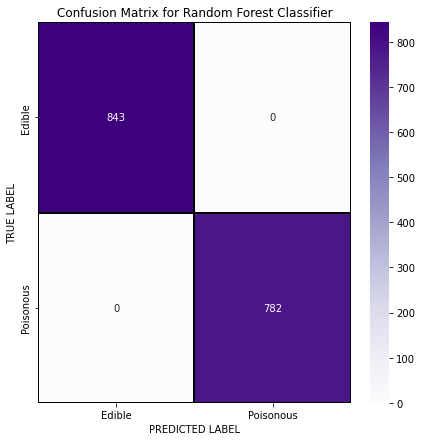

In [55]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Model 6 : GradientBoostingClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [57]:
print("Test Accuracy of Gradient Boosting Classifier: {}%".format(round(gbc.score(x_test, y_test)*100, 2)))

Test Accuracy of Gradient Boosting Classifier: 100.0%


Classification report of Gradient Boosting Classifier

In [58]:
y_pred_gbc = gbc.predict(x_test)
print("Gradient Boosting Classifier report: \n\n", classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



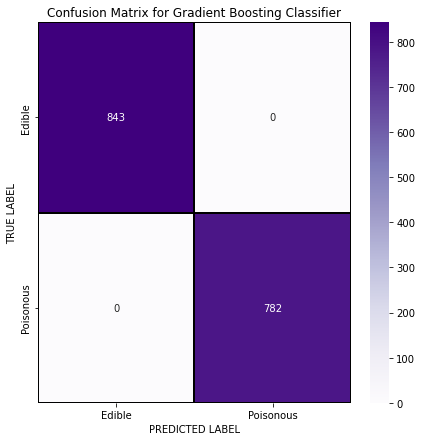

In [59]:
cm = confusion_matrix(y_test, y_pred_gbc)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Model 7 : Extra gradiant boosting


In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
from xgboost import XGBClassifier

In [62]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
print("Test Accuracy of Extra gradiant boosting Classifier: {}%".format(round(xgbc.score(x_test, y_test)*100, 2)))

Test Accuracy of Extra gradiant boosting Classifier: 100.0%


Classification report of Extra gradiant boosting Classifier

In [64]:
y_pred_eg = xgbc.predict(x_test)
print("Extra gradiant boosting Classifier report: \n\n", classification_report(y_test, y_pred_eg))

Extra gradiant boosting Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



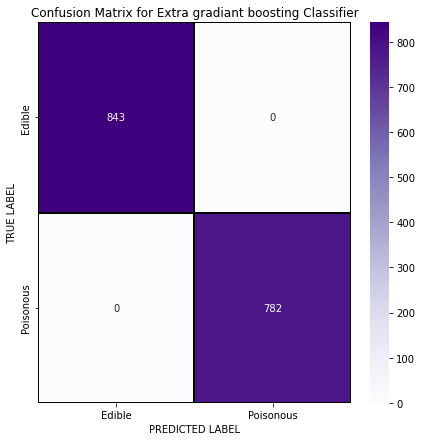

In [65]:
cm = confusion_matrix(y_test, y_pred_eg)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra gradiant boosting Classifier')
plt.show()

# 8. Gaussian Naive Bayes Classifier

In [66]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Test Accuracy of Naive Bayes Classification: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy of Naive Bayes Classification: 92.18%


Classification report of Naive Bayes Classifier

In [78]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



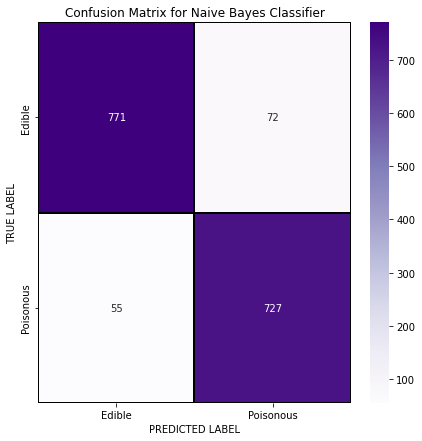

In [79]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [ ]:
#9. Bernoulli Naive Bayes classifier

In [80]:
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Test Accuracy of Naive Bayes Classification: {}%".format(round(nb.score(x_test, y_test)*100, 2)))


Test Accuracy of Naive Bayes Classification: 92.18%


Classification report of Naive Bayes Classifier

In [81]:

print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.85      0.97      0.91       843
           1       0.96      0.82      0.88       782

    accuracy                           0.90      1625
   macro avg       0.91      0.89      0.89      1625
weighted avg       0.90      0.90      0.89      1625



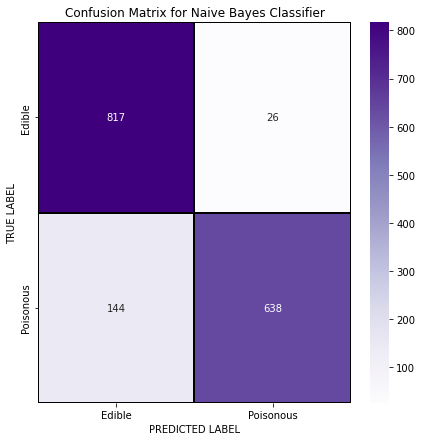

In [82]:
cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Predictions

Predicting some of the x_test results and matching it with true i.e. y_test values using Naive Bayes Classifier.

In [69]:
y_pred_nb =nb.predict(x_test)
print(y_pred_nb[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


 we can see that, predicted and the true values match 100%.

# Conclusion

From the confusion matrix, we saw that our train and test data is balanced.
Most of the classification methods hit 100% accuracy with this dataset.

 to predict if the mushroom is edible or poisonous (e or p) using the given dataset